## TensorFlow and Keras Initialization

This section initializes the necessary libraries and modules for the image recognition task using TensorFlow and Keras.

- **tensorflow (as tf):** The main library for building and training neural networks.

- **tensorflow.keras (as models, layers):** The Keras API from TensorFlow is used for building and training deep learning models. It includes functions and classes for defining layers, models, and optimizers.

- **Adam Optimizer:** A popular optimization algorithm used to update the model's weights during training.

- **ImageDataGenerator:** A powerful tool for real-time data augmentation and preprocessing of images. It helps create a data generator that applies various transformations to the training images, such as rotation, zooming, and flipping.

- **matplotlib.pyplot (as plt):** A library for creating visualizations, particularly used for plotting training and validation loss curves.

- **tqdm:** A Python library that provides a fast, extensible progress bar for loops and iterators. It's used to visualize the progress of certain operations, like hyperparameter tuning.


In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tqdm import tqdm

## Dataset and Image Data Generators

This section sets up the dataset path and initializes image data generators for training and validation. The dataset contains images of flowers, and the goal is to classify them into five different species.

- **Dataset Path:** The variable `dataset_path` is set to the directory path where the flower dataset is stored. Adjust the path accordingly.

- **Image Dimensions:** The height and width of the images are defined as 224 pixels each, and the input shape is set accordingly to (224, 224, 3), representing the height, width, and color channels of the images (RGB).

- **Batch Size and Number of Classes:** The batch size for training the model is set to 32, and the number of classes is defined as 5 since there are five different flower species.

- **Data Generator with Augmentation:** The `ImageDataGenerator` is configured to perform real-time data augmentation during training. Augmentation techniques include rescaling pixel values, shearing, zooming, and horizontal flipping. Additionally, a validation split of 20% is specified to create a subset for validation.

- **Training and Validation Data Generators:** Two data generators (`train_generator` and `validation_generator`) are created using the `flow_from_directory` method. They generate batches of augmented images from the specified dataset path, target size, batch size, and class mode. The `subset` parameter is used to distinguish between training and validation subsets.


In [2]:

# Set the path to the dataset
dataset_path = '../data/raw/flower_photos'

# Define image dimensions
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)

# Define batch size and number of classes
batch_size = 32
num_classes = 5

# Create a data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


## CNN Model Architecture and Training

This section defines a Convolutional Neural Network (CNN) model for flower species classification. It also includes the training process and visualization of training and validation loss over epochs.

### Model Architecture

- **Function to Create and Compile the Model:** The `create_model` function is defined to create a CNN model with configurable learning rate and dropout rate. The model architecture consists of four convolutional layers with max-pooling layers in between. The final layers include a flattened layer, a densely connected layer with 512 neurons, a dropout layer, and an output layer with softmax activation.

- **Model Summary:** The summary of the created model is displayed, providing insights into the layers, output shapes, and total parameters.

### Model Training

- **Training the Model:** The model is trained using the `fit` method with the training data generator (`train_generator`) for 10 epochs. The validation data generator (`validation_generator`) is specified for monitoring the model's performance on unseen data.

- **Visualizing Training and Validation Loss:** The training and validation loss curves are plotted over epochs to assess the model's convergence and performance. The generated plot is saved for future reference.

*Note: The actual outputs and visualizations may vary based on the dataset and training process.*




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

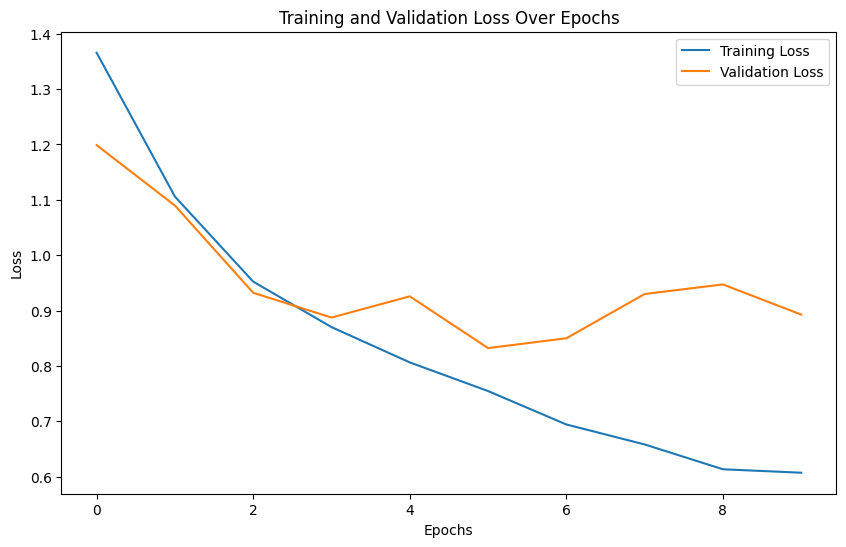

In [3]:

# Define a function to create and compile the model
def create_model(learning_rate=0.001, dropout_rate=0.5):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128,    (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Display the model summary
model = create_model()
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.savefig('../reports/figures/training_and_validation_loss.png')
plt.show()


## Hyperparameter Tuning

This section focuses on hyperparameter tuning to optimize the performance of the CNN model. The tuning involves varying learning rates and dropout rates, and the results are visualized for analysis.

### Hyperparameter Configuration

- **Learning Rates and Dropout Rates:** Two sets of learning rates `[0.001, 0.0001]` and dropout rates `[0.3, 0.5]` are defined for exploration. These values are chosen based on common ranges used in neural network optimization.

### Tuning Process

- **Iterative Model Training:** The script iterates through combinations of learning rates and dropout rates, creating a model for each configuration and training it for 10 epochs. The training process is silent (`verbose=0`) to avoid cluttering the output.

- **Results Collection:** Training histories and test accuracies for each configuration are recorded in the `results` list.

### Visualizing Results

- **Training Accuracy Over Epochs:** Plots of training accuracy over epochs are generated for each hyperparameter configuration, providing insights into how different rates affect model training.

- **Validation Accuracy Over Epochs:** Similar plots for validation accuracy illustrate the model's generalization performance.

### Identifying the Best Hyperparameters

- **Best Hyperparameter Determination:** The script identifies the best hyperparameters based on the test accuracy. The results are printed, displaying the learning rate and dropout rate that resulted in the highest test accuracy.

*Note: The visualizations and results are specific to the dataset and training process.*


Learning Rates: 100%|██████████| 2/2 [3:09:24<00:00, 5682.41s/it]  


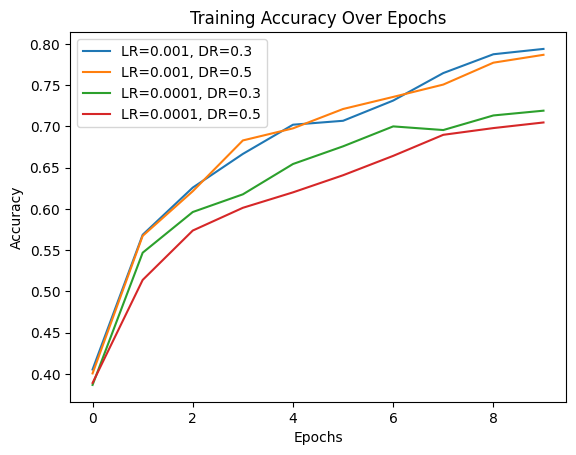

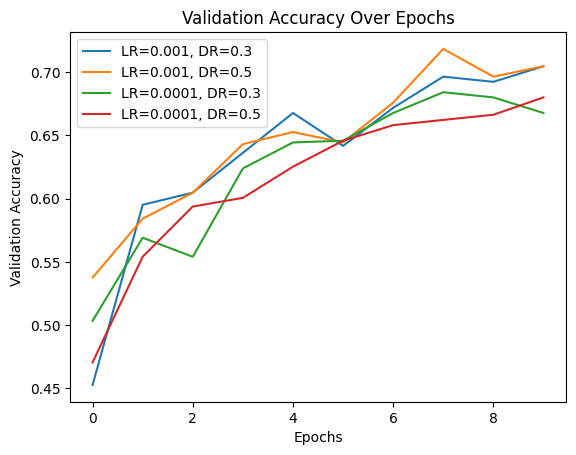

Best Hyperparameters: Learning Rate = 0.001, Dropout Rate = 0.5
Test Accuracy with Best Hyperparameters: 0.7031463980674744


In [4]:

# Hyperparameter tuning
learning_rates = [0.001, 0.0001]
dropout_rates = [0.3, 0.5]

results = []

for lr in tqdm(learning_rates, desc="Learning Rates"):
    for dr in tqdm(dropout_rates, desc="Dropout Rates", leave=False):
        model = create_model(learning_rate=lr, dropout_rate=dr)
        history = model.fit(train_generator, epochs=10, validation_data=validation_generator, verbose=0)
        test_loss, test_acc = model.evaluate(validation_generator, verbose=0)
        results.append({'learning_rate': lr, 'dropout_rate': dr, 'test_accuracy': test_acc, 'history': history})

# Visualize results
for result in results:
    plt.plot(result['history'].history['accuracy'], label=f"LR={result['learning_rate']}, DR={result['dropout_rate']}")

plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('../reports/figures/training_accuracy_hyperparameter_tuning.png')
plt.show()

for result in results:
    plt.plot(result['history'].history['val_accuracy'], label=f"LR={result['learning_rate']}, DR={result['dropout_rate']}")

plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.savefig('../reports/figures/validation_accuracy_hyperparameter_tuning.png')
plt.show()

# Find the best hyperparameters based on test accuracy
best_result = max(results, key=lambda x: x['test_accuracy'])
print(f"Best Hyperparameters: Learning Rate = {best_result['learning_rate']}, Dropout Rate = {best_result['dropout_rate']}")
print(f"Test Accuracy with Best Hyperparameters: {best_result['test_accuracy']}")

